In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Data Preparation and cleaning.

In [ ]:
df=pd.read_csv('gdrive/My Drive/Loan_default.csv')
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [ ]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [ ]:
df.isnull().sum()

,0
LoanID,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,0
DTIRatio,0


In [ ]:
df.duplicated().sum()

0

Observation:

It appears that our data does not have any null values and duplicate value.

In [ ]:
df.shape

(255347, 18)

# Exploratory Data Analysisis

In [ ]:
categorical_variables=['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
                       'HasDependents', 'LoanPurpose','NumCreditLines', 'HasCoSigner', 'Default']


numerical_variables=['Age', 'Income', 'LoanAmount', 'CreditScore',
                     'MonthsEmployed', 'InterestRate', 'LoanTerm', 'DTIRatio',]

we have 18 columns and 255347 rows

In [ ]:
for variable in categorical_variables:
    print(df[variable].value_counts())
    print("-"*50)

Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64
--------------------------------------------------
EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64
--------------------------------------------------
MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64
--------------------------------------------------
HasMortgage
Yes    127677
No     127670
Name: count, dtype: int64
--------------------------------------------------
HasDependents
Yes    127742
No     127605
Name: count, dtype: int64
--------------------------------------------------
LoanPurpose
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: count, dtype: int64
--------------------------------------------------
NumCreditLines
2    64130
3    63834
4    63829
1    63554
Name: count, dtype: i

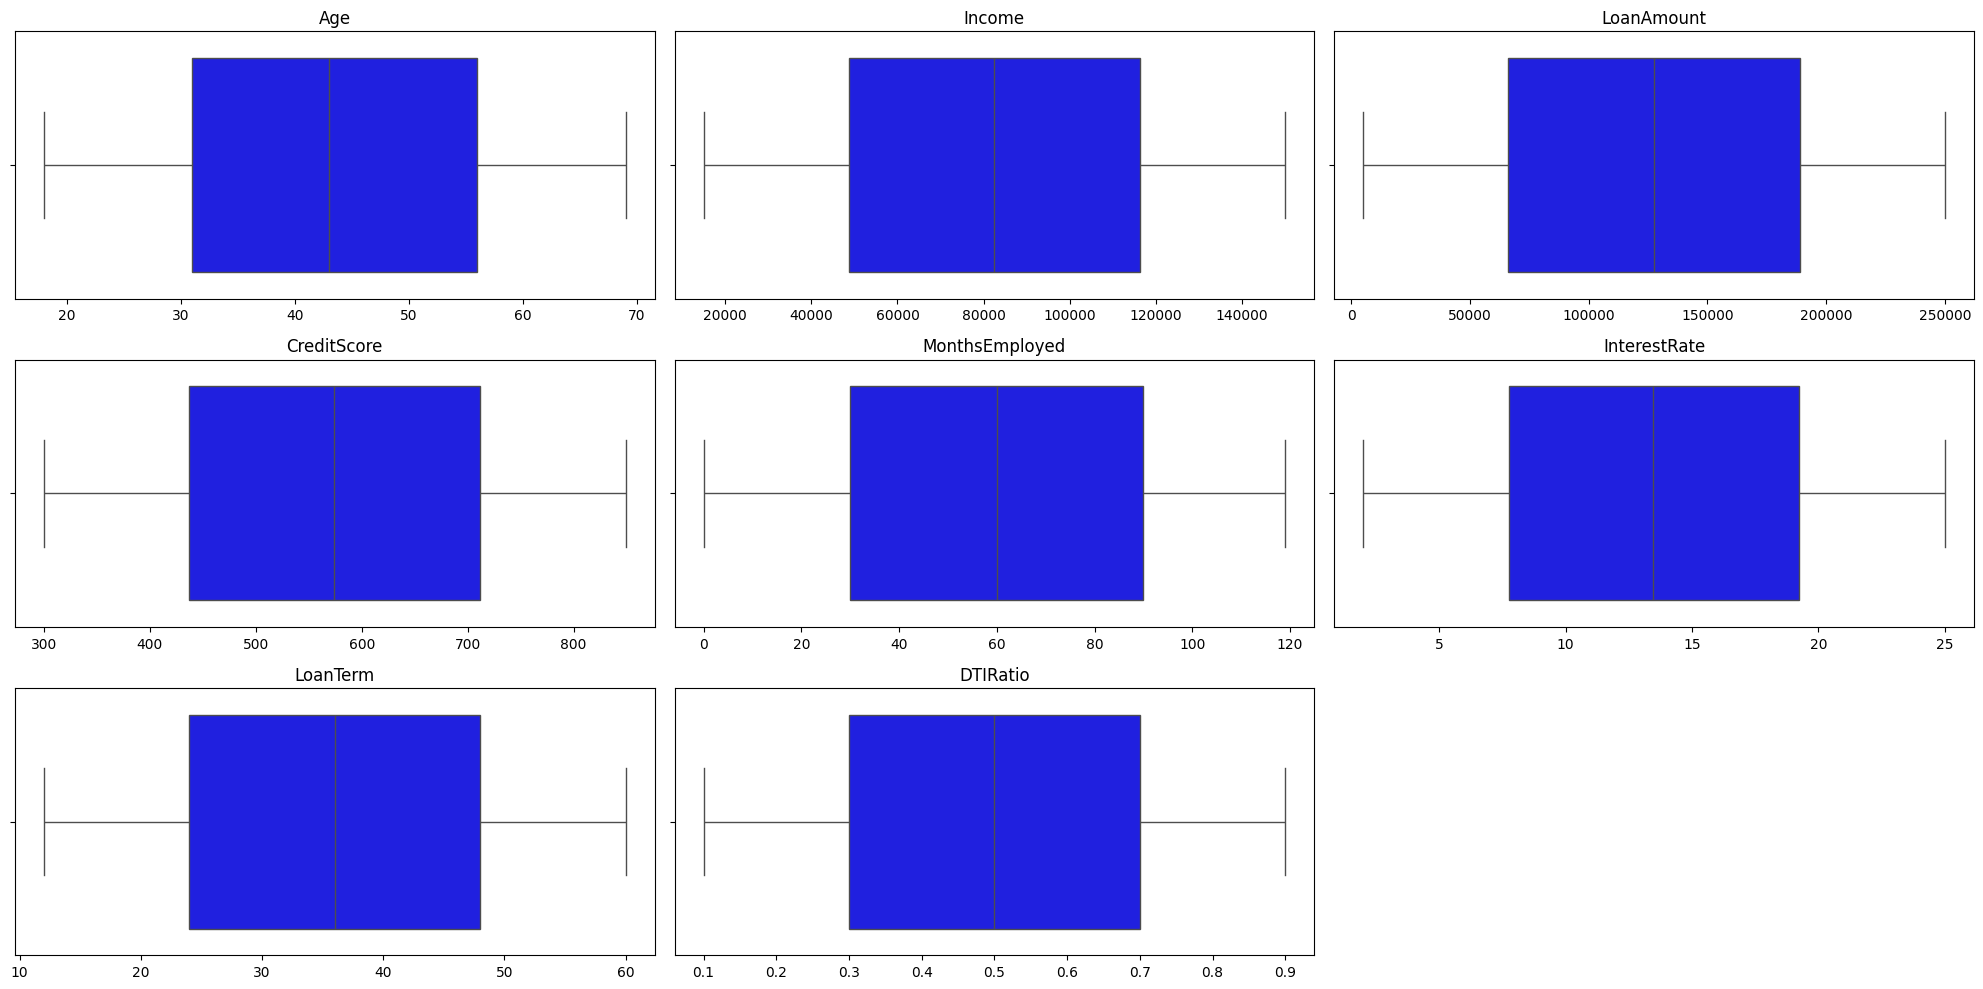

In [ ]:
plt.figure(figsize=(20, 10))
ind=1
for  variable in (numerical_variables):
    plt.subplot(3, 3, ind)
    sns.boxplot(x=df[variable],color="blue")
    plt.title(variable)
    ind+=1
    plt.xlabel('')
plt.tight_layout()
plt.show()

Observation :

There is no such data skewness or outliers is seen in the numerical data.
The dataset is free from outliers and skewness so it is ready to build a machine learning model.

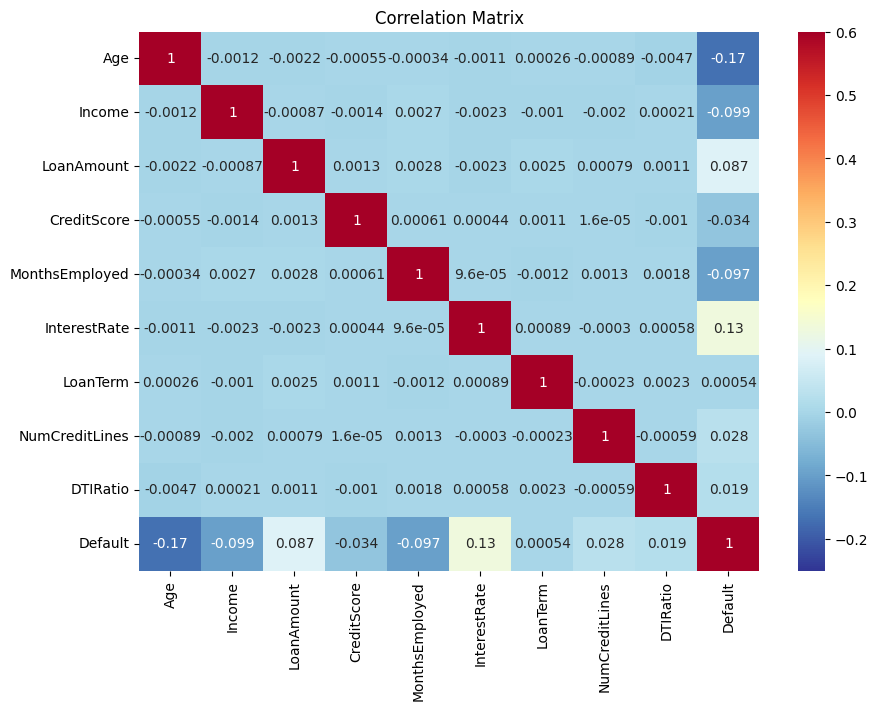

In [ ]:
# Correlation Heatmap (Numerical Columns)

plt.figure(figsize=(10, 7))
sns.heatmap(df[['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'InterestRate', 'LoanTerm',
                'NumCreditLines' ,'DTIRatio',"Default"]].corr(), cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot=True, vmax = 0.6)
plt.title('Correlation Matrix')
plt.show()

Inference :

1.Interest rate and Default are positively correlated (0.13).

2.Age and Default are negatively correlated (-0.17).

3.Credit Score is negatively correlated with Loan default.

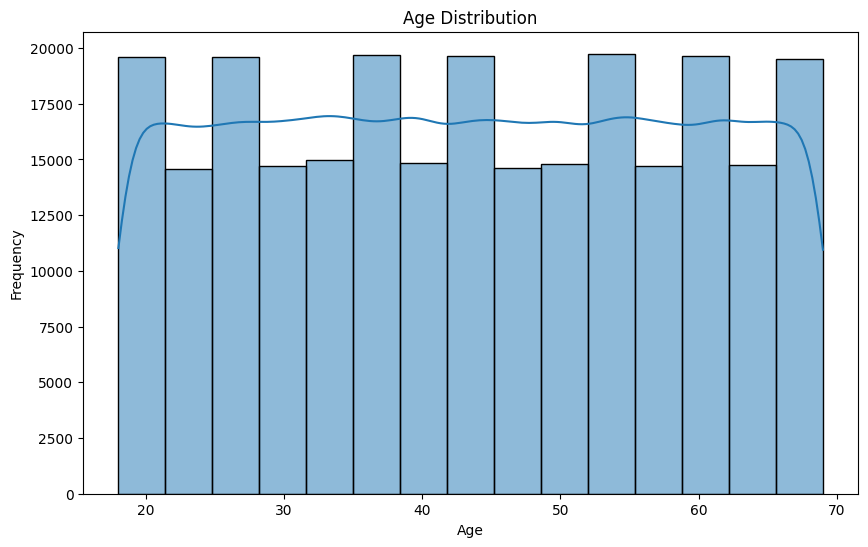

In [ ]:
# Histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=15, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Plots the distribution of Variable
def kde_default(var_name, df):

    # Calculate the correlation coefficient between the new variable and the target
    corr = df['Default'].corr(df[var_name])

    # Calculate medians for repaid vs not repaid
    avg_repaid = df.loc[df['Default'] == 0, var_name].median()
    avg_not_repaid = df.loc[df['Default'] == 1, var_name].median()

    plt.figure(figsize=(12, 6))

    # Plot the distribution for target == 0 and target == 1
    sns.kdeplot(df.loc[df['Default'] == 0, var_name], label='Default == 0')
    sns.kdeplot(df.loc[df['Default'] == 1, var_name], label='Default == 1')

    # Label the plot
    plt.xlabel(var_name)
    plt.ylabel('Density')
    plt.title('%s Distribution' % var_name)
    plt.legend()

    # Print out the correlation
    print('The correlation between %s and the TARGET is %0.4f' % (var_name, corr))

    # Print out average values
    print('Median value for loan that was not repaid = %0.4f' % avg_not_repaid)
    print('Median value for loan that was repaid = %0.4f' % avg_repaid)

The correlation between Age and the TARGET is -0.1678
Median value for loan that was not repaid = 34.0000
Median value for loan that was repaid = 45.0000


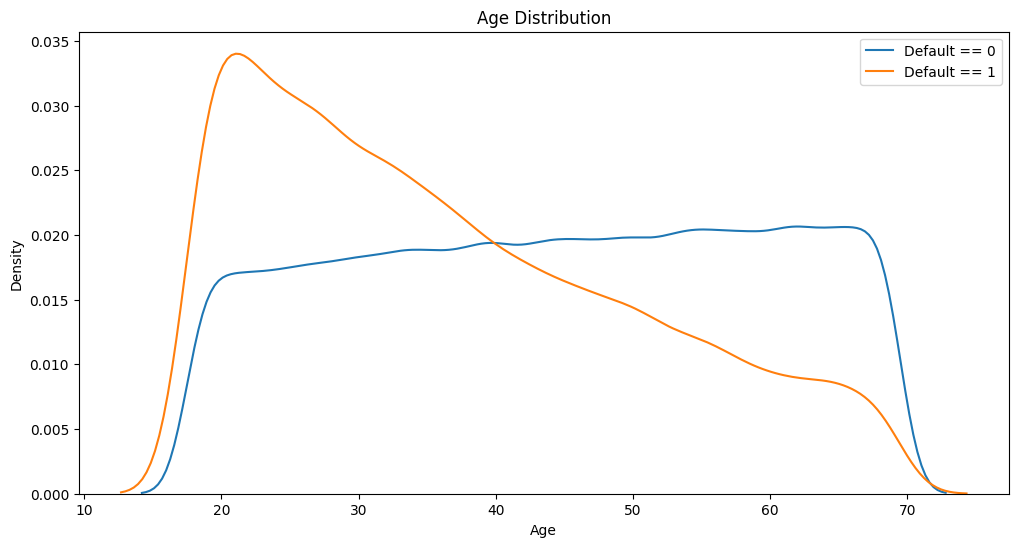

In [ ]:
# kernel density estimation plot for Age
kde_default('Age', df)

The correlation between InterestRate and the TARGET is 0.1313
Median value for loan that was not repaid = 16.9300
Median value for loan that was repaid = 12.9900


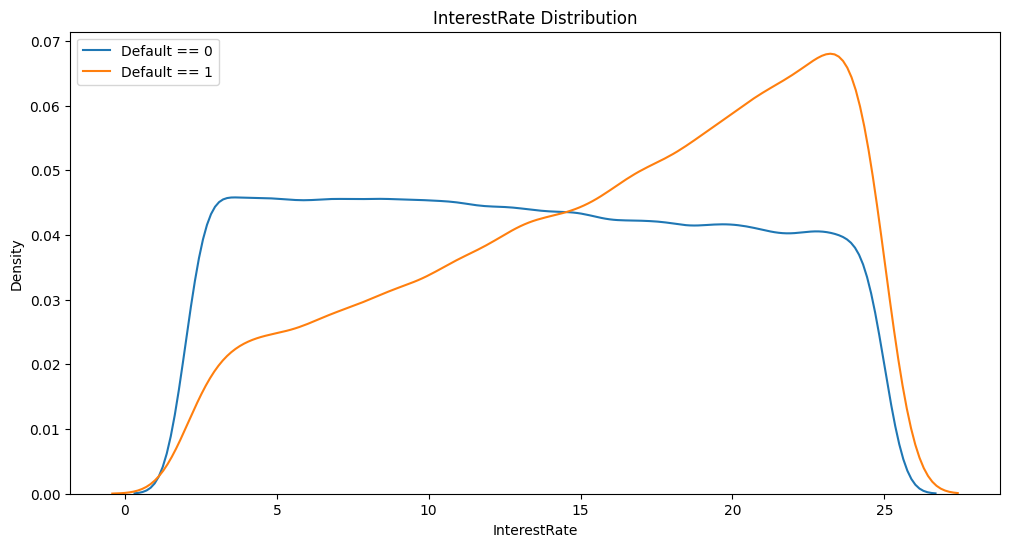

In [ ]:
# kernel density estimation plot for Interest Rates

kde_default('InterestRate', df)

The correlation between Income and the TARGET is -0.0991
Median value for loan that was not repaid = 66566.0000
Median value for loan that was repaid = 84237.5000


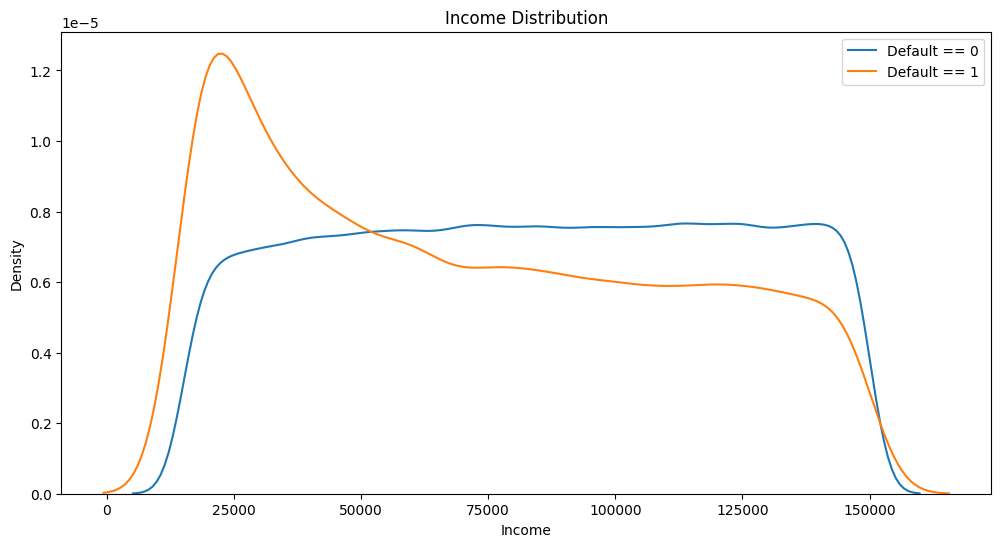

In [ ]:
# kernel density estimation plot for Income

kde_default('Income', df)

# Feature Engineering (Create new features that may improve model performance)

In [ ]:
# Feature Engineering

df['LoanToIncomeRatio'] = df['LoanAmount']/df['Income']
df['FinancialRiskScore'] = df['CreditScore'] - df['LoanToIncomeRatio'] + (df['MonthsEmployed']/12)

The correlation between LoanToIncomeRatio and the TARGET is 0.1790
Median value for loan that was not repaid = 2.0499
Median value for loan that was repaid = 1.4956


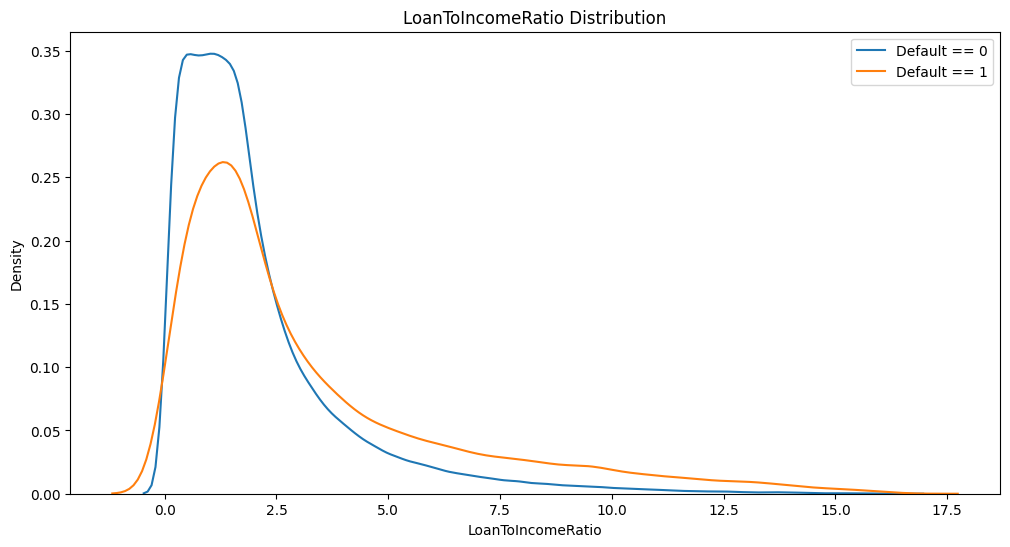

In [ ]:
# kernel density estimation plot for Loan to Income Ratio

kde_default('LoanToIncomeRatio',df)

The correlation between FinancialRiskScore and the TARGET is -0.0384
Median value for loan that was not repaid = 553.8528
Median value for loan that was repaid = 579.5443


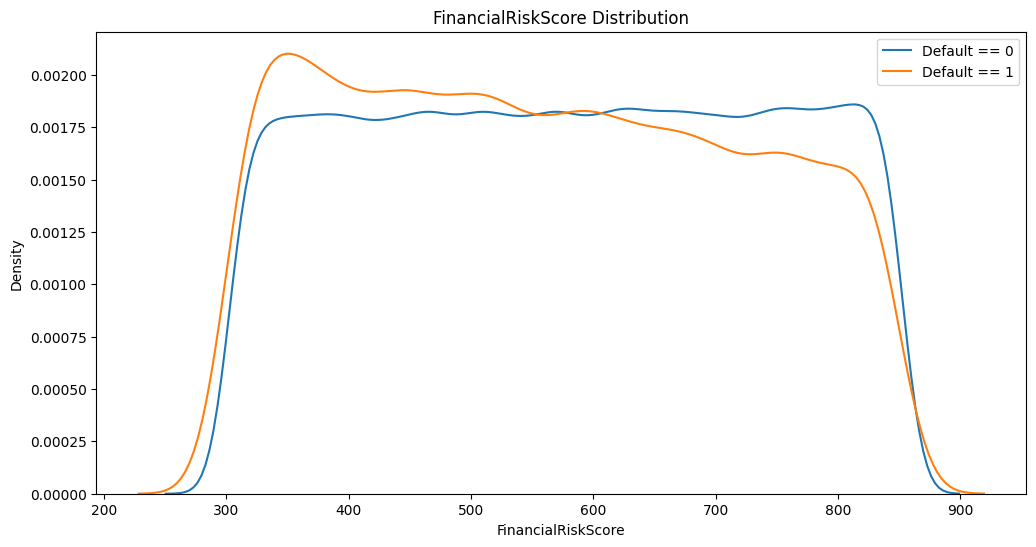

In [ ]:
# kernel density estimation plot for Financial Risk Score

kde_default('FinancialRiskScore',df)

# Machine Learning Model Building evaluation

In [ ]:
from sklearn.model_selection import (train_test_split,
                                     cross_val_score,
                                     RandomizedSearchCV,
                                     GridSearchCV)
from sklearn.preprocessing import StandardScaler

# Step 1: Data Preprocessing and Feature Selection

# Separate features (X) and target variable (y)

X = df.drop(['Default', 'LoanID'], axis=1)
y = df['Default']

# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, drop_first=True)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import (accuracy_score,
                             f1_score,
                             precision_score,
                             recall_score,
                             RocCurveDisplay,
                             precision_recall_curve,
                             average_precision_score,
                             roc_auc_score,
                             roc_curve, auc)

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder

In [ ]:
# Step 2: Feature Selection using Random Forest

# Train RandomForestClassifier to get feature importances
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Select features with importance > 0.03
selected_features = importance_df[importance_df['Importance'] > 0.03]['Feature']

# Filter selected features in train and test datasets
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

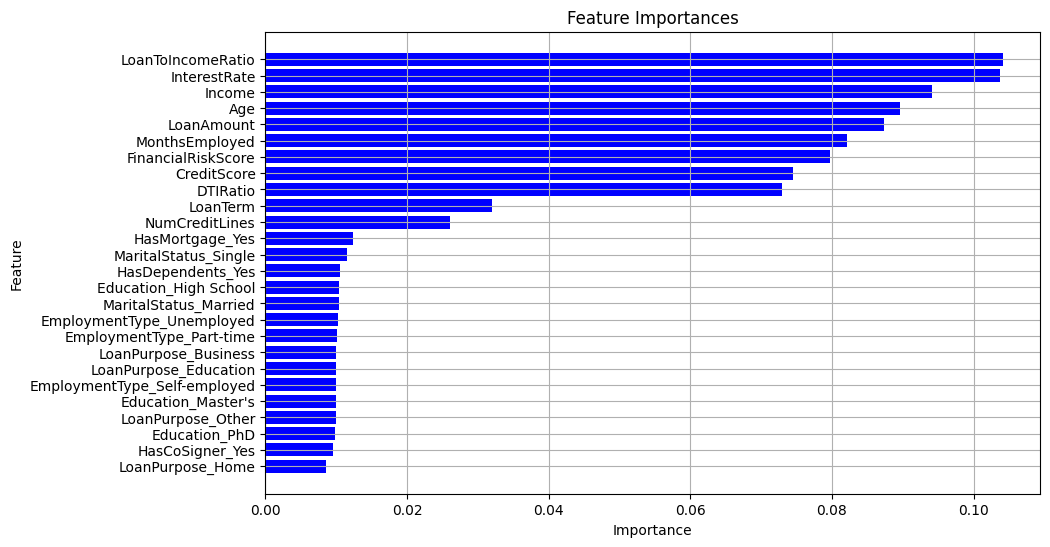

In [ ]:
# Plot feature importances

# Sort importance_df by Importance in descending order
importance_df_sorted = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances in descending order
plt.figure(figsize=(10, 6))
plt.barh(importance_df_sorted['Feature'], importance_df_sorted['Importance'], color='blue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.grid()
plt.show()

In [ ]:
# Print the shapes of the resulting datasets
print("X_train_selected shape:", X_train_selected.shape)
print("X_test_selected shape:", X_test_selected.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Print the distribution of target classes in train and test sets
print("\nDistribution of classes in y_train:")
print(y_train.value_counts(normalize=True))

print("\nDistribution of classes in y_test:")
print(y_test.value_counts(normalize=True))

X_train_selected shape: (204277, 10)
X_test_selected shape: (51070, 10)
y_train shape: (204277,)
y_test shape: (51070,)

Distribution of classes in y_train:
Default
0    0.883722
1    0.116278
Name: proportion, dtype: float64

Distribution of classes in y_test:
Default
0    0.884472
1    0.115528
Name: proportion, dtype: float64


The classes are heavily unbalanced and will heavily skew the results. This MUST be addressed in order to accurately predict our target 'Default' variable. Applying Synthetic Minority Over-Sampling Technique SMOTE

In [ ]:
# Apply SMOTE to balance the classes on the training set only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_selected, y_train)

In [ ]:
# Print shapes after SMOTE
print("X_train_resampled shape:", X_train_resampled.shape)
print("y_train_resampled shape:", y_train_resampled.shape)
print("X_test_selected shape:", X_test_selected.shape)
print("y_test shape:", y_test.shape)

X_train_resampled shape: (361048, 10)
y_train_resampled shape: (361048,)
X_test_selected shape: (51070, 10)
y_test shape: (51070,)


Now both classes are of equal proportion

In [ ]:
print("\nDistribution of classes in y_train resampled:")
print(y_train_resampled.value_counts(normalize=True))


Distribution of classes in y_train resampled:
Default
0    0.5
1    0.5
Name: proportion, dtype: float64


In [ ]:
# Define the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Define the parameter grid for GridSearchCV
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best parameters
grid_search_dt = GridSearchCV(estimator=dt_classifier, param_grid=param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train_resampled, y_train_resampled)

# Get the best Decision Tree classifier with optimal parameters
best_dt_classifier = grid_search_dt.best_estimator_

# Predict on the test set and evaluate performance
y_pred_dt = best_dt_classifier.predict(X_test_selected)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)

# Print evaluation metrics for Decision Tree classifier
print("Decision Tree Classifier:")
print("Best Parameters:", grid_search_dt.best_params_)
print("Test Accuracy:", accuracy_dt)
print("Test Precision:", precision_dt)
print("Test Recall:", recall_dt)
print("Test ROC AUC:", roc_auc_dt)

Decision Tree Classifier:
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Test Accuracy: 0.7761895437634619
Test Precision: 0.1879232505643341
Test Recall: 0.28220338983050847
Test ROC AUC: 0.5614581261749398


In [ ]:
from sklearn.linear_model import LogisticRegression
# Define the Logistic Regression model
log_reg = LogisticRegression()

# Define the parameter grid for GridSearchCV
param_grid_logreg = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Perform GridSearchCV to find the best parameters
grid_search_logreg = GridSearchCV(estimator=log_reg, param_grid=param_grid_logreg, scoring='accuracy', cv=5)
grid_search_logreg.fit(X_train_scaled, y_train)

# Get the best Logistic Regression model with optimal parameters
best_log_reg = grid_search_logreg.best_estimator_

# Evaluate the best model on the test set
y_pred_logreg = best_log_reg.predict(X_test_scaled)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_pred_logreg)

# Print evaluation metrics for the best Logistic Regression model
print("Best Logistic Regression Model:")
print("Best Parameters:", grid_search_logreg.best_params_)
print("Test Accuracy:", accuracy_logreg)
print("Test Precision:", precision_logreg)
print("Test Recall:", recall_logreg)
print("Test ROC AUC:", roc_auc_logreg)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Logistic Regression Model:
Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Test Accuracy: 0.8879772860779322
Test Precision: 0.6333830104321908
Test Recall: 0.07203389830508475
Test ROC AUC: 0.5332939028828944


# Model Interpretation:
a. Explain the impact of features on loan default probabilit.



b. You can use tools like SHAP or LIME to interpret the predictions of the
tree-based model.

In [ ]:
import shap
lr_explainer = shap.Explainer(best_log_reg, X_train_scaled)
lr_shap_values = lr_explainer.shap_values(X_train_scaled)


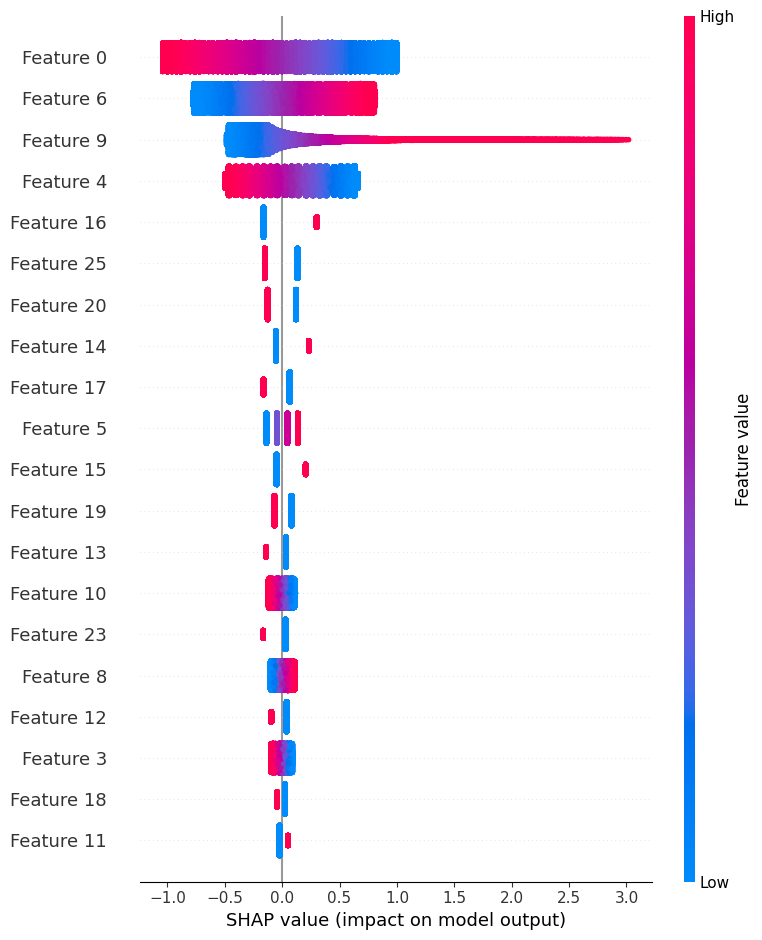

In [ ]:

shap.summary_plot(lr_shap_values, X_train_scaled)

Here's an explanation of the impact of features on loan default probability:

1. CreditScore: A higher CreditScore decreases the loan default probability, as it indicates a better credit history and lower risk.

2. Income: A higher Income increases the loan default probability, as it may indicate a higher debt-to-income ratio or over-reliance on credit.

3. LoanAmount: A larger LoanAmount increases the loan default probability, as it represents a higher debt burden.

4. InterestRate: A higher InterestRate increases the loan default probability, as it may lead to higher monthly payments and financial strain.

5. EmploymentType: Certain EmploymentTypes (e.g., self-employed or freelance) may increase the loan default probability due to income instability.

6. MaritalStatus: Being married or in a long-term partnership may decrease the loan default probability, as it often indicates financial stability.

7. HasMortgage: Having a mortgage increases the loan default probability, as it adds to the individual's debt burden.

8. HasDependents: Having dependents increases the loan default probability, as it may lead to higher expenses and financial strain.

9. LoanTerm: Longer LoanTerms increase the loan default probability, as they represent a longer period of debt obligation.

Fairness & Bias Evaluation: we have bias for majority class that we have handles using sampling method